### Importing libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
india_cc = pd.read_csv("Credit card transactions - India - Simple.csv")
india_cc.head(10)

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574
5,5,"Delhi, India",8-Sep-14,Silver,Bills,F,100036
6,6,"Delhi, India",24-Feb-15,Gold,Bills,F,143250
7,7,"Greater Mumbai, India",26-Jun-14,Platinum,Bills,F,150980
8,8,"Delhi, India",28-Mar-14,Silver,Bills,F,192247
9,9,"Delhi, India",1-Sep-14,Platinum,Bills,F,67932


In [5]:
india_cc.shape

(26052, 7)

In [6]:
#Converting the amount to USD using the current exchange rate of (0.012)

exchange_rate = 0.012  
india_cc['Amount_usd'] = (india_cc['Amount'] * exchange_rate).round().astype('Int64')

print(india_cc[['Amount', 'Amount_usd']])

       Amount  Amount_usd
0       82475         990
1       32555         391
2      101738        1221
3      123424        1481
4      171574        2059
...       ...         ...
26047  128191        1538
26048  246316        2956
26049  265019        3180
26050   88174        1058
26051  184410        2213

[26052 rows x 2 columns]


In [7]:
india_cc.head(10)


,index,City,Date,Card Type,Exp Type,Gender,Amount,Amount_usd
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475,990
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555,391
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738,1221
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424,1481
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574,2059
5,5,"Delhi, India",8-Sep-14,Silver,Bills,F,100036,1200
6,6,"Delhi, India",24-Feb-15,Gold,Bills,F,143250,1719
7,7,"Greater Mumbai, India",26-Jun-14,Platinum,Bills,F,150980,1812
8,8,"Delhi, India",28-Mar-14,Silver,Bills,F,192247,2307
9,9,"Delhi, India",1-Sep-14,Platinum,Bills,F,67932,815


- checking for missing data

In [8]:
india_cc.isnull().sum()

index         0
City          0
Date          0
Card Type     0
Exp Type      0
Gender        0
Amount        0
Amount_usd    0
dtype: int64

- confirming column dtypes

In [9]:
india_cc.dtypes

index          int64
City          object
Date          object
Card Type     object
Exp Type      object
Gender        object
Amount         int64
Amount_usd     Int64
dtype: object

- converting Date column to datetime type

In [10]:
india_cc['Date'] = pd.to_datetime(india_cc['Date'])
india_cc.dtypes

index                  int64
City                  object
Date          datetime64[ns]
Card Type             object
Exp Type              object
Gender                object
Amount                 int64
Amount_usd             Int64
dtype: object

- Adding a month and year column 

In [11]:
#month 
india_cc.insert( 3,'Month', india_cc.Date.dt.month)

In [12]:
#Year
india_cc.insert( 4,'Year', india_cc.Date.dt.year)

In [13]:
india_cc.head(5)

,index,City,Date,Month,Year,Card Type,Exp Type,Gender,Amount,Amount_usd
0,0,"Delhi, India",2014-10-29,10,2014,Gold,Bills,F,82475,990
1,1,"Greater Mumbai, India",2014-08-22,8,2014,Platinum,Bills,F,32555,391
2,2,"Bengaluru, India",2014-08-27,8,2014,Silver,Bills,F,101738,1221
3,3,"Greater Mumbai, India",2014-04-12,4,2014,Signature,Bills,F,123424,1481
4,4,"Bengaluru, India",2015-05-05,5,2015,Gold,Bills,F,171574,2059


- removing excess texts from the City column

In [14]:
india_cc['City'] = india_cc['City'].str.replace(', India', '')
india_cc['City'].head(10)

0             Delhi
1    Greater Mumbai
2         Bengaluru
3    Greater Mumbai
4         Bengaluru
5             Delhi
6             Delhi
7    Greater Mumbai
8             Delhi
9             Delhi
Name: City, dtype: object

In [15]:
india_cc.sort_values('Amount', ascending= False).head(10)

,index,City,Date,Month,Year,Card Type,Exp Type,Gender,Amount,Amount_usd
80,80,Greater Mumbai,2014-10-14,10,2014,Platinum,Bills,F,998077,11977
134,134,Delhi,2013-10-27,10,2013,Gold,Bills,F,996754,11961
254,254,Ahmedabad,2015-04-17,4,2015,Gold,Bills,F,996291,11955
183,183,Ahmedabad,2014-08-27,8,2014,Platinum,Bills,F,995634,11948
330,330,Delhi,2014-06-07,6,2014,Signature,Bills,F,994537,11934
343,343,Greater Mumbai,2014-09-06,9,2014,Signature,Bills,F,994184,11930
68,68,Greater Mumbai,2014-03-22,3,2014,Gold,Bills,F,991685,11900
141,141,Greater Mumbai,2013-10-04,10,2013,Gold,Bills,F,990700,11888
28,28,Bengaluru,2015-01-18,1,2015,Platinum,Bills,F,987935,11855
17,17,Greater Mumbai,2015-03-30,3,2015,Gold,Bills,F,986379,11837


-  Gender with the highest total amount ?

In [16]:
#Checking the number of female users compared to male users
india_cc.groupby('Gender')['index'].count()

Gender
F    13680
M    12372
Name: index, dtype: int64

In [17]:
amount_by_gender = india_cc.groupby('Gender')['Amount_usd'].sum()
amount_by_gender

Gender
F    26463720
M    22434300
Name: Amount_usd, dtype: Int64

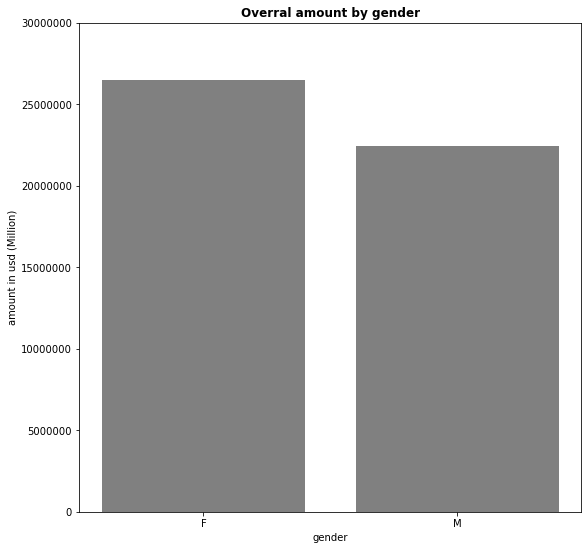

In [18]:
plt.figure(figsize= (9,9))
plt.bar( x= amount_by_gender.index,
        height= amount_by_gender.values ,
        color ='Grey')
plt.xlabel('gender')
plt.ylabel('amount in usd (Million)')
plt.yticks(ticks=plt.yticks()[0], labels=plt.yticks()[0].astype(int))
plt.title('Overral amount by gender', fontsize = 12, fontweight = 'bold' )
plt.show()

- Which Date, Month and  Year had the highest and lowest total amount ?

In [19]:
#Getting total amount of each day
amount_by_date = india_cc.groupby('Date')['Amount_usd'].sum()
amount_by_date.sort_values(ascending= False)

Date
2014-10-07    135393
2014-09-20    127535
2014-08-11    126972
2015-01-12    125982
2013-10-13    125279
               ...  
2014-05-09     47191
2014-07-17     47115
2014-12-19     46718
2014-08-29     44455
2014-01-18     40902
Name: Amount_usd, Length: 600, dtype: Int64

In [78]:
#Getting total amount of each month 
amount_by_month = india_cc.groupby('Month')['Amount_usd'].sum()
amount_by_month.sort_values(ascending = False)

Month
1     5174524
10    5038182
12    5003192
4     4996717
3     4920685
11    4849307
2     4602157
5     4505472
8     2621442
9     2514725
7     2375761
6     2295856
Name: Amount_usd, dtype: Int64

In [81]:
#Getting total amount of each year 
amount_by_year = india_cc.groupby('Year')['Amount_usd'].sum().sort_values(ascending = False)
amount_by_year

Year
2014    29456560
2015    12077731
2013     7363729
Name: Amount_usd, dtype: Int64

Text(0.5, 1.0, 'Total amount generated per year')

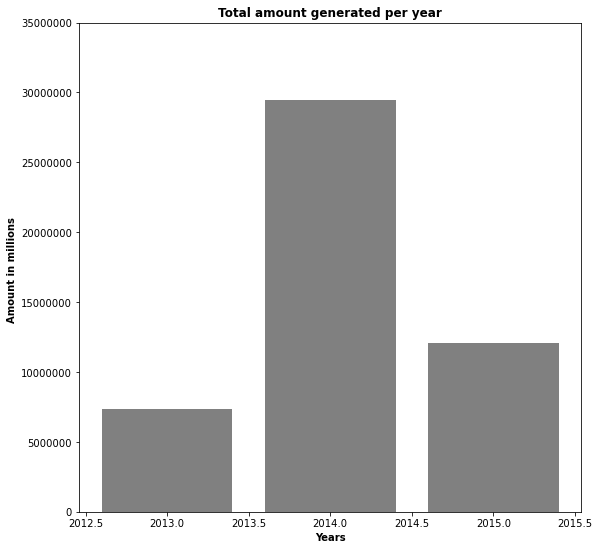

In [82]:
#plotting bar graph to compare the total amount generated per year.
plt.figure(figsize = (9,9))
plt.bar(x = amount_by_year.index,
        height = amount_by_year.values,
        color = 'grey')
plt.ylabel('Amount in millions ', fontweight = 'bold')
plt.xlabel('Years', fontweight = 'bold')
plt.yticks(ticks=plt.yticks()[0], labels=plt.yticks()[0].astype(int))
plt.title('Total amount generated per year', fontsize =12, fontweight = 'bold')

In [23]:
amount_by__year_month = india_cc.groupby(['Year', 'Month'])['Amount_usd'].sum()
amount_by__year_month

Year  Month
2013  10       2488327
      11       2304196
      12       2571206
2014  1        2491798
      2        2270642
      3        2438819
      4        2499408
      5        2421157
      6        2295856
      7        2375761
      8        2621442
      9        2514725
      10       2549855
      11       2545111
      12       2431986
2015  1        2682726
      2        2331515
      3        2481866
      4        2497309
      5        2084315
Name: Amount_usd, dtype: Int64

- finding any correlation in spending between months 

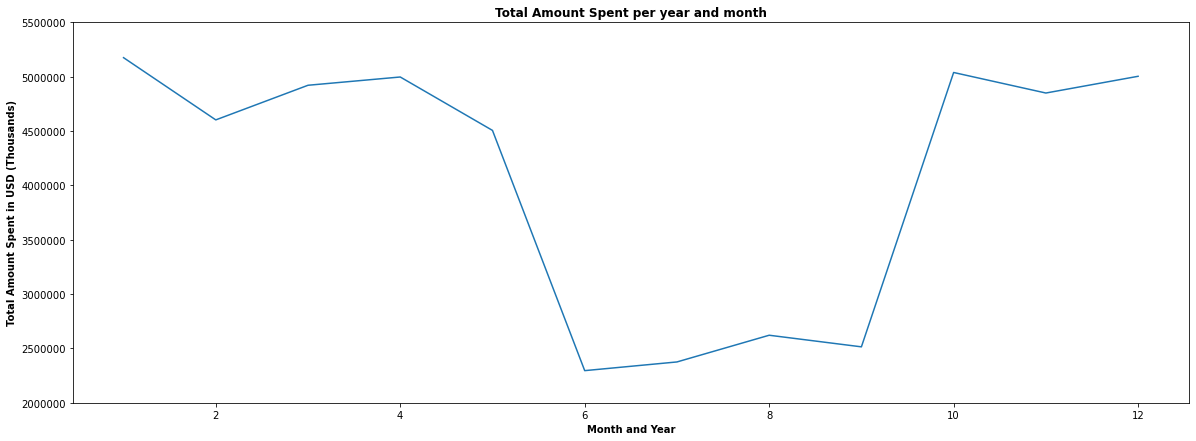

In [83]:
plt.figure(figsize = (20,7))
plt.plot(amount_by_month.index, amount_by_month.values,)
plt.xlabel('Month and Year', fontweight = 'bold')
plt.ylabel('Total Amount Spent in USD (Thousands)', fontweight = 'bold')
plt.yticks(ticks=plt.yticks()[0], labels=plt.yticks()[0].astype(int))
plt.title('Total Amount Spent per year and month', fontsize = 12, fontweight = 'bold')
plt.show()

- avg & max amount  of transactions per gender 

In [25]:
#Average amount
india_cc.groupby('Gender')['Amount_usd'].mean().round(0)

Gender
F    1934.0
M    1813.0
Name: Amount_usd, dtype: Float64

In [26]:
#Max amount
india_cc.groupby('Gender')['Amount_usd'].max()

Gender
F    11977
M     3600
Name: Amount_usd, dtype: Int64

- Location
- Which city has the highest and lowest total amount generated ?

In [27]:
#Highest
india_cc.groupby('City')['Amount_usd'].sum().sort_values( ascending = False).head(5)

City
Greater Mumbai    6921018
Bengaluru         6867903
Ahmedabad         6813542
Delhi             6683169
Kolkata           1385600
Name: Amount_usd, dtype: Int64

In [28]:
#Lowest
india_cc.groupby('City')['Amount_usd'].sum().sort_values( ascending = True).head(5)

City
Fazilka          179
Mahbubnagar      185
Bahraich         291
Tirur            313
Changanassery    361
Name: Amount_usd, dtype: Int64

In [29]:
amount_by_city_gender = india_cc.groupby(['City', 'Gender'])['Amount_usd'].sum()
amount_by_city_gender.sort_values(ascending= False)

City            Gender
Greater Mumbai  F         4051398
Bengaluru       F         3974378
Delhi           F         3884320
Ahmedabad       F         3830059
                M         2983483
                           ...   
Dhoraji         M              62
Titlagarh       F              56
Ambejogai       M              52
Uravakonda      F              50
Bahraich        F              15
Name: Amount_usd, Length: 1876, dtype: Int64

In [30]:
#Gender comparsion 
amount_by_mumbai_gender = amount_by_city_gender.loc['Greater Mumbai', :]
amount_by_mumbai_gender

Gender
F    4051398
M    2869620
Name: Amount_usd, dtype: Int64

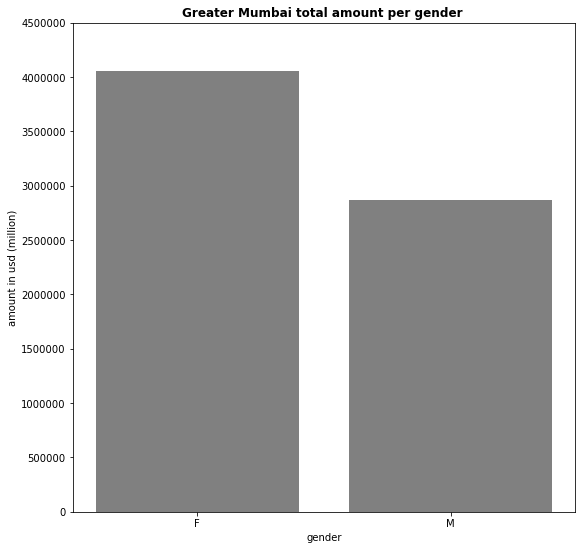

In [31]:
plt.figure(figsize= (9,9))
plt.bar( x= amount_by_mumbai_gender.index,
        height= amount_by_mumbai_gender.values ,
        color ='Grey')
plt.xlabel('gender')
plt.ylabel('amount in usd (million)')
plt.yticks(ticks=plt.yticks()[0], labels=plt.yticks()[0].astype(int))
plt.title('Greater Mumbai total amount per gender ', fontsize = 12, fontweight = 'bold' )
plt.show()

In [32]:
amount_by_fazilka_gender = amount_by_city_gender.loc['Fazilka',:]
amount_by_fazilka_gender


Gender
M    179
Name: Amount_usd, dtype: Int64

In [33]:
#Had to confirm i wasnt seeing my own things
india_cc[india_cc['City'] == 'Fazilka']

,index,City,Date,Month,Year,Card Type,Exp Type,Gender,Amount,Amount_usd
19538,19538,Fazilka,2014-04-28,4,2014,Signature,Food,M,14949,179


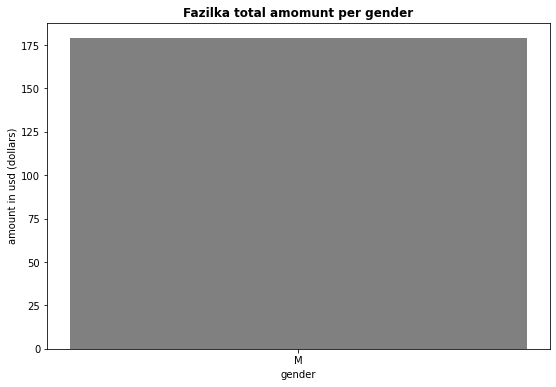

In [34]:
plt.figure(figsize= (9,6))
plt.bar( x= amount_by_fazilka_gender.index,
        height= amount_by_fazilka_gender.values,
        color ='Grey')
plt.xlabel('gender')
plt.ylabel('amount in usd (dollars)')
plt.title('Fazilka total amomunt per gender', fontsize = 12, fontweight= 'bold' )
plt.show()

- cardtypes 
- Which card type is the most commonly used in each city?

In [35]:
#checking the unique card types
india_cc['Card Type'].unique()

array(['Gold', 'Platinum', 'Silver', 'Signature'], dtype=object)

In [36]:
#Amount generated overral by each card type
Total_amount_per_card = india_cc.groupby('Card Type')['Amount_usd'].sum().sort_values(ascending = False)
Total_amount_per_card

Card Type
Silver       12835370
Signature    12156536
Platinum     12091693
Gold         11814421
Name: Amount_usd, dtype: Int64

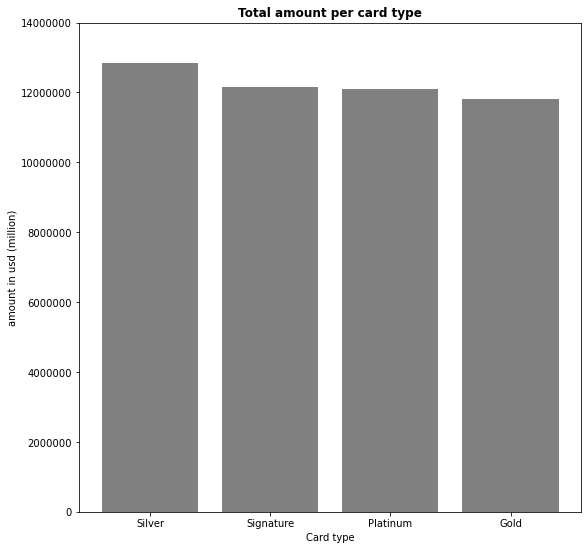

In [37]:
plt.figure(figsize= (9,9))
plt.bar( x= Total_amount_per_card.index,
        height= Total_amount_per_card.values ,
        color ='Grey')
plt.xlabel('Card type')
plt.ylabel('amount in usd (million)')
plt.yticks(ticks=plt.yticks()[0], labels=plt.yticks()[0].astype(int))
plt.title('Total amount per card type', fontsize = 12, fontweight = 'bold' )
plt.show()

In [38]:
india_cc.groupby(['Card Type', 'City'])['Amount_usd'].sum().sort_values(ascending = False)


Card Type  City          
Silver     Bengaluru         1897914
           Greater Mumbai    1873696
           Ahmedabad         1863658
           Delhi             1836055
Platinum   Ahmedabad         1765642
                              ...   
Signature  Vandavasi              25
Silver     Nathdwara              20
Signature  Sadulpur               17
Gold       Dhamtari               17
Platinum   Bahraich               15
Name: Amount_usd, Length: 3104, dtype: Int64

In [39]:
#Checking top city contributers for silver(Highest overall card type)
Silver_with_city = india_cc.groupby(['Card Type', 'City'])['Amount_usd'].sum().sort_values(ascending = False)
top5_cities_silver = Silver_with_city.loc['Silver',:].head(5)
top5_cities_silver

City
Bengaluru         1897914
Greater Mumbai    1873696
Ahmedabad         1863658
Delhi             1836055
Kolkata            363122
Name: Amount_usd, dtype: Int64

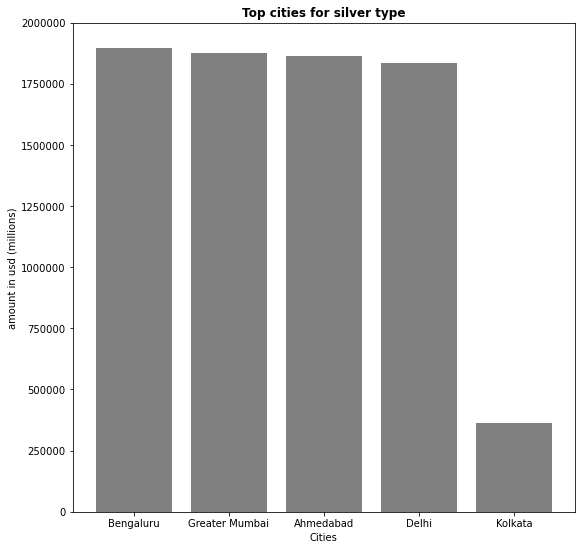

In [40]:
plt.figure(figsize= (9,9))
plt.bar( x= top5_cities_silver.index,
        height= top5_cities_silver.values ,
        color ='Grey')
plt.xlabel('Cities')
plt.ylabel('amount in usd (millions)')
plt.yticks(ticks=plt.yticks()[0], labels=plt.yticks()[0].astype(int))
plt.title('Top cities for silver type', fontsize = 12, fontweight = 'bold' )
plt.show()

In [41]:
#Gender comparison for bengaluru
silver = india_cc[india_cc['Card Type'] == 'Silver']
silver_city_gender = silver.groupby(['City', 'Gender'])['Amount_usd'].sum()
silver_bengaluru = silver_city_gender.loc['Bengaluru', :]
silver_bengaluru    

Gender
F    1197776
M     700138
Name: Amount_usd, dtype: Int64

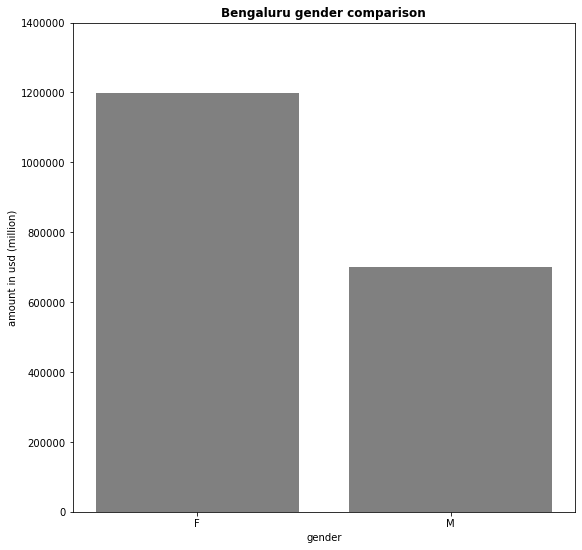

In [42]:
plt.figure(figsize= (9,9))
plt.bar( x= silver_bengaluru.index,
        height= silver_bengaluru.values ,
        color ='Grey')
plt.xlabel('gender')
plt.ylabel('amount in usd (million)')
plt.yticks(ticks=plt.yticks()[0], labels=plt.yticks()[0].astype(int))
plt.title('Bengaluru gender comparison', fontsize = 12, fontweight = 'bold' )
plt.show()

In [43]:
#Checking top city contributers for gold (Lowest overall card type)
Gold_with_city = india_cc.groupby(['Card Type', 'City'])['Amount_usd'].sum().sort_values(ascending = False)
top5_cities_gold = Gold_with_city.loc['Gold',:].head(5)
top5_cities_gold

City
Greater Mumbai    1655800
Delhi             1635169
Bengaluru         1618450
Ahmedabad         1590521
Chennai            359356
Name: Amount_usd, dtype: Int64

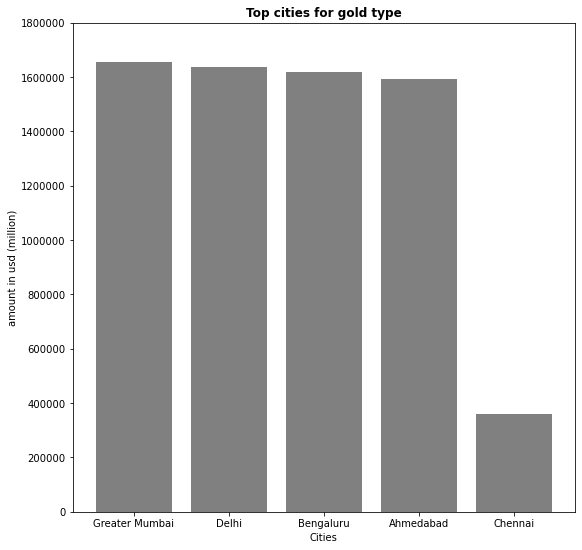

In [44]:
plt.figure(figsize= (9,9))
plt.bar( x= top5_cities_gold.index,
        height= top5_cities_gold.values ,
        color ='Grey')
plt.xlabel('Cities')
plt.ylabel('amount in usd (million)')
plt.yticks(ticks=plt.yticks()[0], labels=plt.yticks()[0].astype(int))
plt.title('Top cities for gold type', fontsize = 12, fontweight = 'bold' )
plt.show()

In [45]:
#Gender comparison for Greater Mumbai
Gold = india_cc[india_cc['Card Type'] == 'Gold']
gold_city_gender = Gold.groupby(['City', 'Gender'])['Amount_usd'].sum()
gold_greater_mumbai = gold_city_gender.loc['Greater Mumbai', :]
gold_greater_mumbai

Gender
F    926417
M    729383
Name: Amount_usd, dtype: Int64

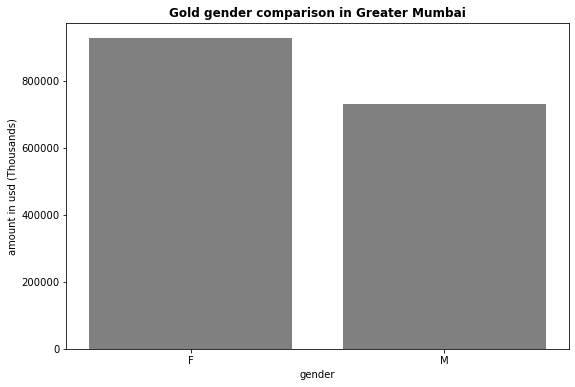

In [46]:
plt.figure(figsize = (9,6))
plt.bar(x = gold_greater_mumbai.index,
        height = gold_greater_mumbai.values,
        color = 'Grey')
plt.ylabel('amount in usd (Thousands)')
plt.xlabel('gender')
plt.title('Gold gender comparison in Greater Mumbai', fontsize = 12, fontweight = 'bold')
plt.show()

- What is the average amount spent per transaction for each card type

In [47]:
india_cc.groupby('Card Type')['Amount_usd'].mean().round(0)

Card Type
Gold         1856.0
Platinum     1890.0
Signature    1886.0
Silver       1877.0
Name: Amount_usd, dtype: Float64

- What is the max amount spent per transaction for each card type

In [48]:
india_cc.groupby('Card Type')['Amount_usd'].max()

Card Type
Gold         11961
Platinum     11977
Signature    11934
Silver       11466
Name: Amount_usd, dtype: Int64

- How does the amount spent vary by gender across different card types 

In [49]:
india_cc.groupby(['Card Type','Gender'])['Amount_usd'].sum()

Card Type  Gender
Gold       F         6275150
           M         5539271
Platinum   F         6383264
           M         5708429
Signature  F         6576095
           M         5580441
Silver     F         7229211
           M         5606159
Name: Amount_usd, dtype: Int64

- Expense type

In [50]:
Expense_type_total = india_cc.groupby('Exp Type')['Amount_usd'].sum().sort_values(ascending= False)
Expense_type_total

Exp Type
Bills            10884865
Food              9896675
Fuel              9469663
Entertainment     8717240
Grocery           8618512
Travel            1311065
Name: Amount_usd, dtype: Int64

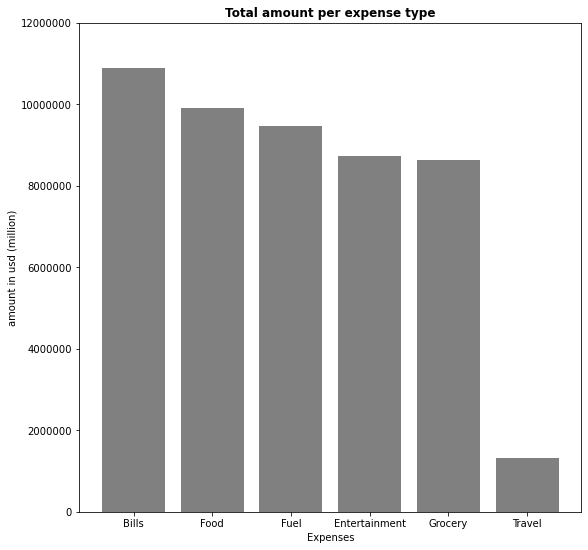

In [51]:
plt.figure(figsize= (9,9))
plt.bar( x= Expense_type_total.index,
        height= Expense_type_total.values ,
        color ='Grey')
plt.xlabel('Expenses')
plt.ylabel('amount in usd (million)')
plt.yticks(ticks=plt.yticks()[0], labels=plt.yticks()[0].astype(int))
plt.title('Total amount per expense type', fontsize = 12, fontweight = 'bold' )
plt.show()

In [52]:
#Average expense paid per expense type
india_cc.groupby('Exp Type')['Amount_usd'].mean().sort_values(ascending = False).round(2)


Exp Type
Bills            2143.53
Entertainment    1830.58
Grocery           1812.9
Food             1811.58
Fuel             1801.34
Travel           1776.51
Name: Amount_usd, dtype: Float64

In [53]:
#Max expense paid per expense type
india_cc.groupby('Exp Type')['Amount_usd'].max().sort_values(ascending = False)

Exp Type
Bills            11977
Entertainment     3599
Fuel              3599
Grocery           3599
Food              3598
Travel            3595
Name: Amount_usd, dtype: Int64

- find any correlation or similarity in expense spending 

- *Bills*

In [54]:
#Bills
bills_by_month = india_cc.groupby('Month')['Amount_usd'].sum()
bills_by_month 

Month
1     5174524
2     4602157
3     4920685
4     4996717
5     4505472
6     2295856
7     2375761
8     2621442
9     2514725
10    5038182
11    4849307
12    5003192
Name: Amount_usd, dtype: Int64

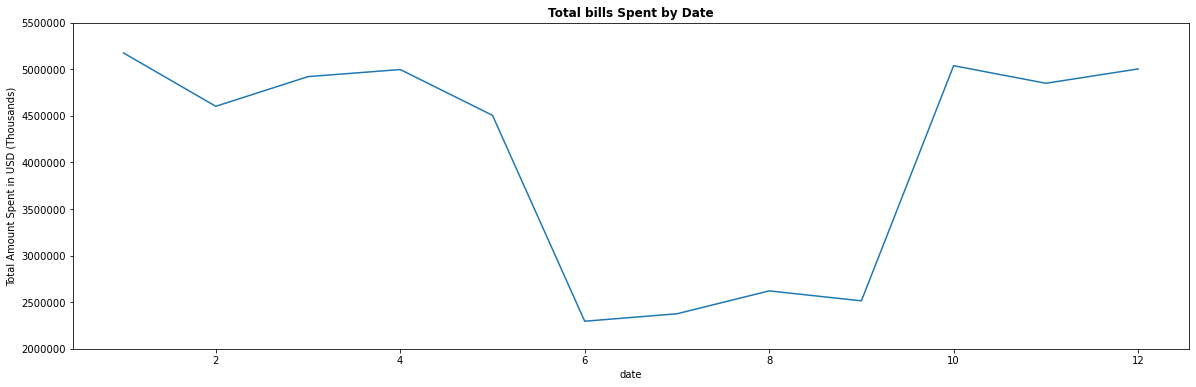

In [55]:
plt.figure(figsize = (20,6))
plt.plot(bills_by_month.index, bills_by_month.values,)
plt.xlabel('date')
plt.ylabel('Total Amount Spent in USD (Thousands)')
plt.yticks(ticks=plt.yticks()[0], labels=plt.yticks()[0].astype(int))
plt.title('Total bills Spent by Date', fontsize = 12, fontweight = 'bold')
plt.show()

In [56]:
bills_by_date = india_cc.groupby('Date')['Amount_usd'].sum()

In [57]:
#Finding days where bills passed the average spending expense
mean_of_sum_bills = round(bills_by_date.mean(),2)
mean_of_sum_bills

81496.7

In [58]:
days_above_avg_bills = bills_by_date[ bills_by_date >= 81496.67]
days_above_avg_bills.sort_values(ascending = False)

Date
2014-10-07    135393
2014-09-20    127535
2014-08-11    126972
2015-01-12    125982
2013-10-13    125279
               ...  
2014-10-14     82164
2014-09-27     82088
2014-12-06     82019
2015-04-20     81890
2015-04-29     81625
Name: Amount_usd, Length: 282, dtype: Int64

- Top cities in each expense type 

In [59]:
exp_type_city = india_cc.groupby(['Exp Type', 'City'])['Amount_usd'].sum().sort_values(ascending= False)
exp_type_city

Exp Type       City          
Bills          Greater Mumbai    1842784
               Bengaluru         1697984
               Ahmedabad         1695484
               Delhi             1683003
Food           Bengaluru         1485636
                                  ...   
Grocery        Dhamtari               17
Entertainment  Rahuri                 17
Food           Bahraich               15
Grocery        Bhabua                 13
Food           Murshidabad            12
Name: Amount_usd, Length: 3500, dtype: Int64

In [60]:
bills_city = exp_type_city.loc['Bills'].head(5)
bills_city

City
Greater Mumbai    1842784
Bengaluru         1697984
Ahmedabad         1695484
Delhi             1683003
Kolkata            258513
Name: Amount_usd, dtype: Int64

In [61]:
food_city = exp_type_city.loc['Food'].head(5)
food_city

City
Bengaluru         1485636
Delhi             1441572
Ahmedabad         1409599
Greater Mumbai    1361453
Surat              264993
Name: Amount_usd, dtype: Int64

In [62]:
fuel_city =  exp_type_city.loc['Fuel'].head(5)
fuel_city

City
Bengaluru         1416799
Ahmedabad         1398004
Greater Mumbai    1394813
Delhi             1384193
Pune               253706
Name: Amount_usd, dtype: Int64

In [63]:
entertainment_city =  exp_type_city.loc['Entertainment'].head(5)
entertainment_city

City
Ahmedabad         1170029
Bengaluru         1152730
Greater Mumbai    1147155
Delhi             1059403
Surat              293768
Name: Amount_usd, dtype: Int64

In [64]:
groceries_city =  exp_type_city.loc['Grocery'].head(5)
groceries_city

City
Greater Mumbai    1174813
Ahmedabad         1140426
Delhi             1114998
Bengaluru         1114754
Hyderabad          274218
Name: Amount_usd, dtype: Int64

In [65]:
travel_city =  exp_type_city.loc['Travel'].head(5)
travel_city

City
Chennai      194928
Jaipur       183043
Kanpur       180200
Hyderabad    176879
Pune         147634
Name: Amount_usd, dtype: Int64

In [66]:
india_cc.head(1)

,index,City,Date,Month,Year,Card Type,Exp Type,Gender,Amount,Amount_usd
0,0,Delhi,2014-10-29,10,2014,Gold,Bills,F,82475,990


- what purpuse were the card types used for ?

In [67]:
card_type_expense = india_cc.groupby(['Card Type', 'Exp Type'])['Amount_usd'].sum()
card_type_expense

Card Type  Exp Type     
Gold       Bills            2706391
           Entertainment    2081605
           Food             2325081
           Fuel             2332121
           Grocery          1994947
           Travel            374276
Platinum   Bills            2664329
           Entertainment    2227318
           Food             2523826
           Fuel             2328843
           Grocery          2056331
           Travel            291046
Signature  Bills            2713397
           Entertainment    2143783
           Food             2474977
           Fuel             2253588
           Grocery          2240800
           Travel            329991
Silver     Bills            2800748
           Entertainment    2264534
           Food             2572791
           Fuel             2555111
           Grocery          2326434
           Travel            315752
Name: Amount_usd, dtype: Int64

In [68]:
silver_expense = card_type_expense.loc['Silver', :].sort_values(ascending = False)
silver_expense

Exp Type
Bills            2800748
Food             2572791
Fuel             2555111
Grocery          2326434
Entertainment    2264534
Travel            315752
Name: Amount_usd, dtype: Int64

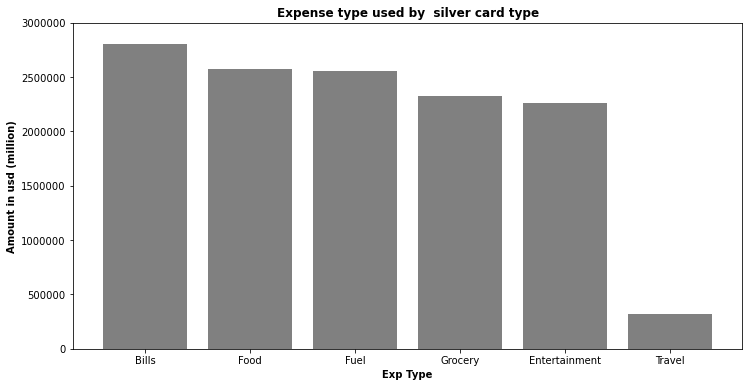

In [69]:
plt.figure(figsize = (12,6))
plt.bar(x = silver_expense.index,
        height = silver_expense.values,
        color = 'Grey')
plt.xlabel('Exp Type', fontweight = 'bold')
plt.ylabel('Amount in usd (million)', fontweight = 'bold')
plt.yticks(ticks=plt.yticks()[0], labels=plt.yticks()[0].astype(int))
plt.title('Expense type used by  silver card type', fontweight = 'bold', fontsize = 12)
plt.show()

In [70]:
gold_expense = card_type_expense.loc['Gold',:].sort_values(ascending = False)
gold_expense

Exp Type
Bills            2706391
Fuel             2332121
Food             2325081
Entertainment    2081605
Grocery          1994947
Travel            374276
Name: Amount_usd, dtype: Int64

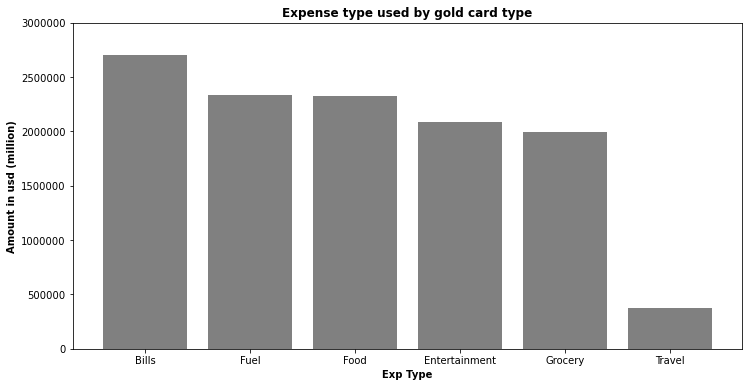

In [71]:
plt.figure(figsize = (12,6))
plt.bar(x = gold_expense.index,
        height = gold_expense.values,
        color = 'Grey')
plt.xlabel('Exp Type', fontweight = 'bold')
plt.ylabel('Amount in usd (million)', fontweight = 'bold')
plt.yticks(ticks=plt.yticks()[0], labels=plt.yticks()[0].astype(int))
plt.title('Expense type used by gold card type', fontweight = 'bold', fontsize = 12)
plt.show()

In [72]:
signature_expense = card_type_expense.loc['Signature', :].sort_values(ascending = False)
signature_expense

Exp Type
Bills            2713397
Food             2474977
Fuel             2253588
Grocery          2240800
Entertainment    2143783
Travel            329991
Name: Amount_usd, dtype: Int64

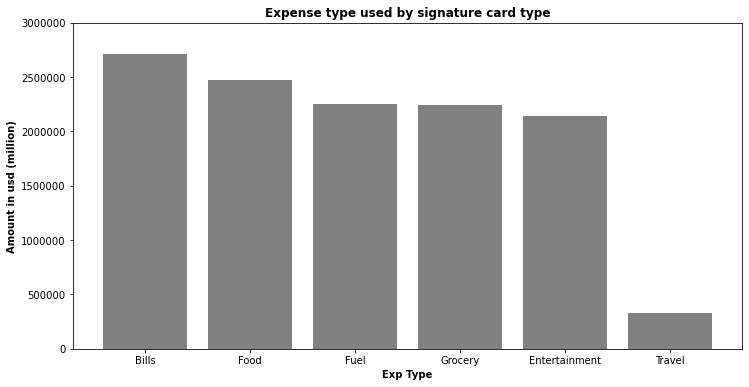

In [73]:
plt.figure(figsize = (12,6))
plt.bar(x = signature_expense.index,
        height = signature_expense.values,
        color = 'Grey')
plt.xlabel('Exp Type', fontweight = 'bold')
plt.ylabel('Amount in usd (million)', fontweight = 'bold')
plt.yticks(ticks=plt.yticks()[0], labels=plt.yticks()[0].astype(int))
plt.title('Expense type used by signature card type', fontweight = 'bold', fontsize = 12)
plt.show()

In [74]:
platinum_expense = card_type_expense.loc['Platinum', :].sort_values(ascending = False)
platinum_expense

Exp Type
Bills            2664329
Food             2523826
Fuel             2328843
Entertainment    2227318
Grocery          2056331
Travel            291046
Name: Amount_usd, dtype: Int64

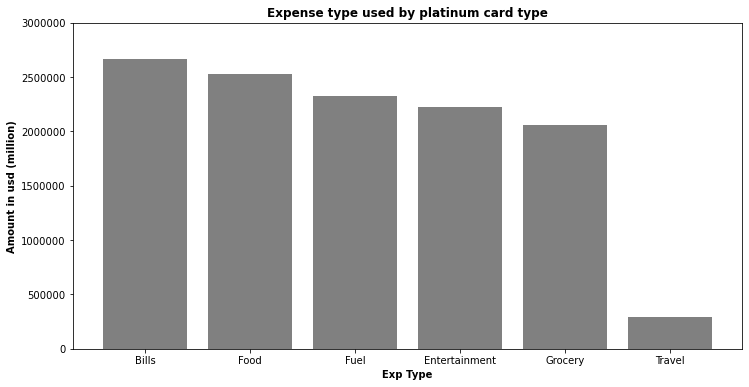

In [75]:
plt.figure(figsize = (12,6))
plt.bar(x = platinum_expense.index,
        height = platinum_expense.values,
        color = 'Grey')
plt.xlabel('Exp Type', fontweight = 'bold')
plt.ylabel('Amount in usd (million)', fontweight = 'bold')
plt.yticks(ticks=plt.yticks()[0], labels=plt.yticks()[0].astype(int))
plt.title('Expense type used by platinum card type', fontweight = 'bold', fontsize = 12)
plt.show()